In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal


mpl.rcParams['font.size'] = 10
# setting 
mpl.rcParams["mathtext.default"] = "it"
mpl.rcParams['mathtext.fontset'] = 'cm'
import seaborn as sns

#sns.plotting_context("poster")
sns.set_style("white")
#sns.axes_style({'font.family':'serif', 'font.serif':'Arial'})
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Latin Modern Roman', "xtick.direction": "in","ytick.direction": "in"})
print("Using following seaborn style:")
print(sns.axes_style())

Using following seaborn style:
{'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'axes.grid': False, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'in', 'ytick.direction': 'in', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Latin Modern Roman'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


# analytic 1D beam field

## from convolution

In [2]:
def retard_angle_1D_ultra_relativistic(alpha_axis) :
    import numpy as np

    psi = np.zeros_like(alpha_axis)
    eta = np.zeros_like(alpha_axis)

    positive_axis = (alpha_axis>0)
    zero_point = (alpha_axis==0)
    negative_axis = (alpha_axis<0)
    psi[positive_axis] = (24.0*alpha_axis[positive_axis])**(1.0/3.0)
    psi[negative_axis] = -0.5*alpha_axis[negative_axis]
    eta[positive_axis] = 0.5*(np.pi - alpha_axis[positive_axis] - psi[positive_axis]) 
    eta[negative_axis] = 0.5*(-np.pi - alpha_axis[negative_axis] - psi[negative_axis])
    eta[zero_point] = np.pi/2.0

    return (psi, eta)

5.666275399350814e-10 500.6367685616696


<IPython.core.display.Javascript object>


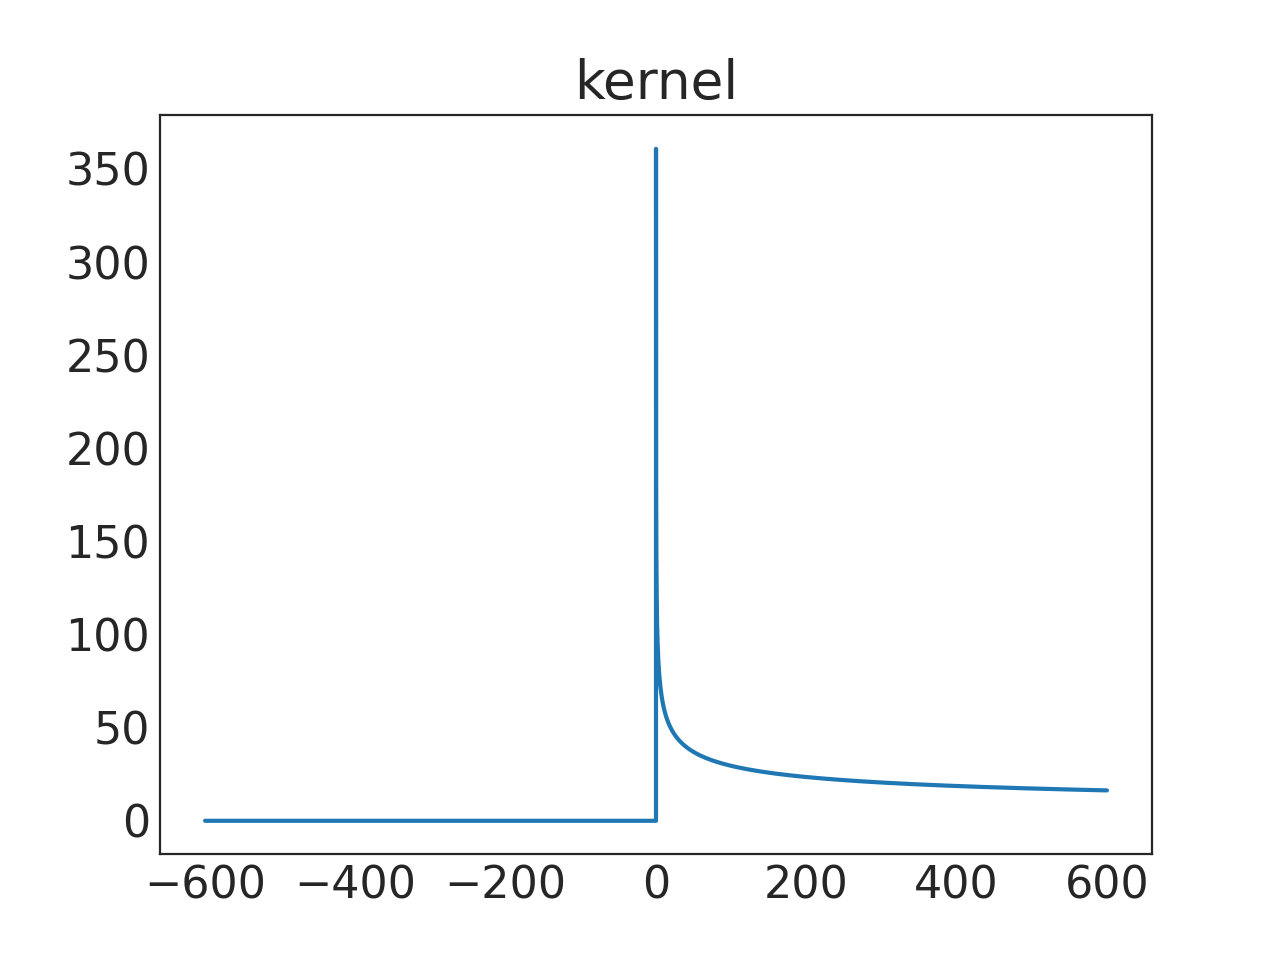

Text(0.5, 1.0, 'kernel')

In [3]:
gamma = 100
beta = np.sqrt(1.0-gamma**(-2.0))
size = np.int(100001)
xrange = 600
sigma = 200.0/1e6*gamma**3.0/6.0
method = "potential"   # "potential", "potential_far_field_approx" or "field"

axis = np.linspace(-xrange/2.0, xrange/2.0, size)
axis2 = np.linspace(-xrange/1.0, xrange/1.0, np.int(size*2))
alpha = axis2/gamma**3.0
psi, eta = retard_angle_1D_ultra_relativistic(alpha)

if (method=="field") :
    kernel = 0.5*beta*beta*(beta-np.sin(eta))/(1.0-beta*np.sin(eta))**3.0 # 1D CSR acceleration field
if (method=="potential") :
    #kernel = 1.0/psi
    #kernel = beta*(1.0-beta*beta*np.cos(alpha + psi)) /(1.0-beta*np.sin(eta)) /psi # 1D lw potential (phi-beta*A_s)
    kernel = (-beta*(1.0-beta) + 1*beta*(1.0-beta*beta*np.cos(alpha + psi)) /(1.0-beta*np.sin(eta))) /psi# regulaized 1D lw potential (phi-beta*A_s)
    #kernel = (alpha[1]-alpha[0])*np.cumsum(0.5*beta*beta*(beta-np.sin(eta))/(1.0-beta*np.sin(eta))**3.0) # 1D CSR acceleration field
if (method=="potential_far_field_approx") :
    kernel = np.zeros_like(axis2)
    kernel[axis2>0] = axis2[axis2>0]**(-1.0/3.0)
print(kernel.min(), kernel.max())    

beam_shape = np.exp(-0.5*(axis/sigma)**2.0)         # Gaussian beam
#beam_shape = -(axis/sigma)*np.exp(-0.5*(axis/sigma)**2.0)    # derivative of Gaussian beam

plt.figure()
max_points_for_plot = 1e5
sample_interval = np.int(size/max_points_for_plot)+1
plt.plot(axis2[::sample_interval], kernel[::sample_interval])
#plt.plot(axis2[::sample_interval], kernel[::sample_interval]/np.abs(kernel).max())
#plt.plot(axis[::sample_interval],beam_shape[::sample_interval])
plt.title("kernel")

In [4]:
axis_1e5=axis[::sample_interval]
beam_fld=signal.fftconvolve(beam_shape, kernel, mode="same")
if (method in ["potential", "potential_far_field_approx"] ) : beam_fld = np.gradient(beam_fld)
beam_fld_1e5 = beam_fld[::sample_interval]/np.abs(beam_fld).max()

<IPython.core.display.Javascript object>


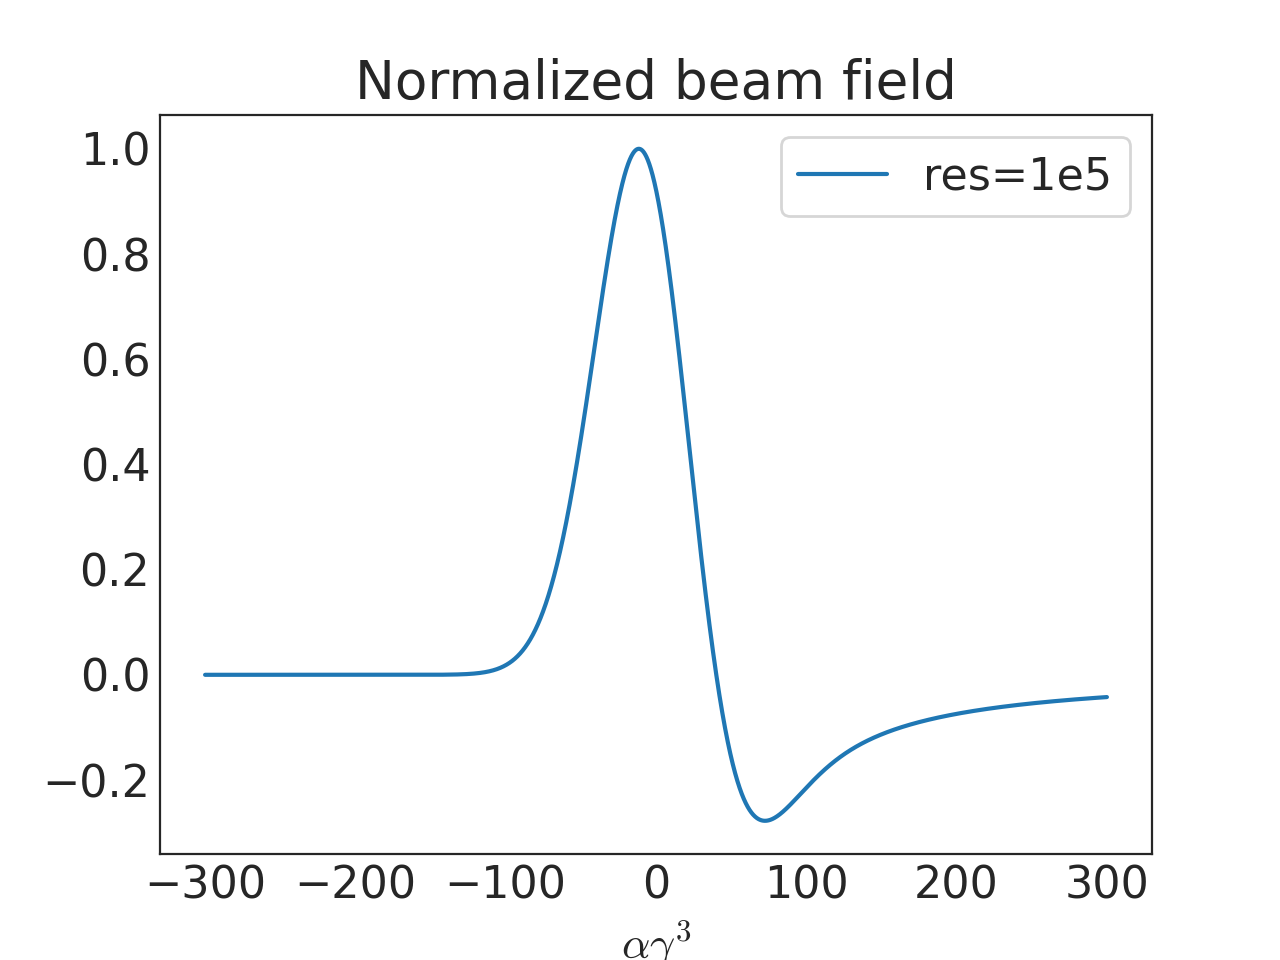

In [5]:
plt.figure(101)
plt.clf()
plt.plot(axis_1e5, beam_fld_1e5, label="res=1e5")
plt.xlabel(r"$\alpha \gamma^{3}$")
plt.title("Normalized beam field")
plt.legend(loc="upper right")

# Cosyr result analysis

In [6]:
import CosyrAnalyze          

## Load wavefronts and mesh

In [7]:
gamma = 100
nalpha = 101
nchi = 3
step = 1
particle_id = 0
ndirs = 0
R_bend = 1.0 # meter
N = 10000    # number of particles
beam_charge = N*1.6e-19  # Coulomb
dt = 0.0002
xy_prime_range = [-6.0, 6.0, -6.0, 6.0] # in terms of beam sigma

beta = np.sqrt(1.0-gamma**(-2.0))

In [8]:
pencil_beam_result=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_reference/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
pencil_beam_result.load_wavefronts()
pencil_beam_result.load_cmesh()

setting gamma to  100
setting data_dir to  ../build/test_beam_reference/
setting charge to  0.01
setting R_bend to  1.0
setting pid to  0
setting step to  1
setting dt to  0.0001
setting traj_type to  2
setting load_data_all to  0
setting wf_xy_rotate to  0
setting wf_xy2polar to  0
setting p_beam to  None
setting self to  <CosyrAnalyze.CosyrAnalyze object at 0x131418ac0>


In [9]:
pencil_beam_nalpha_101=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_nalpha_101/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
pencil_beam_nalpha_101.load_wavefronts()
pencil_beam_nalpha_101.load_cmesh()

setting gamma to  100
setting data_dir to  ../build/test_beam_remap_nalpha_101/
setting charge to  0.01
setting R_bend to  1.0
setting pid to  0
setting step to  1
setting dt to  0.0001
setting traj_type to  2
setting load_data_all to  0
setting wf_xy_rotate to  0
setting wf_xy2polar to  0
setting p_beam to  None
setting self to  <CosyrAnalyze.CosyrAnalyze object at 0x131418cd0>


In [24]:
pencil_beam_nalpha_71=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_nalpha_71/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
pencil_beam_nalpha_71.load_wavefronts()
pencil_beam_nalpha_71.load_cmesh()

setting gamma to  100
setting data_dir to  ../build/test_beam_remap_nalpha_71/
setting charge to  0.01
setting R_bend to  1.0
setting pid to  0
setting step to  1
setting dt to  0.0001
setting traj_type to  2
setting load_data_all to  0
setting wf_xy_rotate to  0
setting wf_xy2polar to  0
setting p_beam to  None
setting self to  <CosyrAnalyze.CosyrAnalyze object at 0x13173e310>


In [50]:
pencil_beam_nalpha_71_dev_100=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_nalpha_71_dev100/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
pencil_beam_nalpha_71_dev_100.load_wavefronts()
pencil_beam_nalpha_71_dev_100.load_cmesh()

setting gamma to  100
setting data_dir to  ../build/test_beam_remap_nalpha_71_dev100/
setting charge to  0.01
setting R_bend to  1.0
setting pid to  0
setting step to  1
setting dt to  0.0001
setting traj_type to  2
setting load_data_all to  0
setting wf_xy_rotate to  0
setting wf_xy2polar to  0
setting p_beam to  None
setting self to  <CosyrAnalyze.CosyrAnalyze object at 0x131bbda00>


In [33]:
pencil_beam_nalpha_51=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_nalpha_51/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
pencil_beam_nalpha_51.load_wavefronts()
pencil_beam_nalpha_51.load_cmesh()

setting gamma to  100
setting data_dir to  ../build/test_beam_remap_nalpha_51/
setting charge to  0.01
setting R_bend to  1.0
setting pid to  0
setting step to  1
setting dt to  0.0001
setting traj_type to  2
setting load_data_all to  0
setting wf_xy_rotate to  0
setting wf_xy2polar to  0
setting p_beam to  None
setting self to  <CosyrAnalyze.CosyrAnalyze object at 0x131acd160>


In [10]:
# pencil_beam_wpc4_1=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_wpc4_1/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
# pencil_beam_wpc4_1.load_wavefronts()
# pencil_beam_wpc4_1.load_cmesh()

In [11]:
# pencil_beam_wpc0_5_1=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_wpc0.5_1/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
# pencil_beam_wpc0_5_1.load_wavefronts()
# pencil_beam_wpc0_5_1.load_cmesh()

In [12]:
# pencil_beam_wpc0_5_1_r2=CosyrAnalyze.CosyrAnalyze(gamma, "../build/test_beam_remap_wpc0.5_1_r2/", pid=particle_id, step = step, load_data_all=0, wf_xy_rotate=0, )
# pencil_beam_wpc0_5_1_r2.load_wavefronts()
# pencil_beam_wpc0_5_1_r2.load_cmesh()

In [53]:
mesh_potential=pencil_beam_result.cmesh_fld1.reshape([nalpha,nchi]).T[1,:]
mesh_potential_nalpha_51=pencil_beam_nalpha_51.cmesh_fld1.reshape([nalpha-50,nchi]).T[1,:]
mesh_potential_nalpha_71=pencil_beam_nalpha_71.cmesh_fld1.reshape([nalpha-30,nchi]).T[1,:]
mesh_potential_nalpha_71_dev_100=pencil_beam_nalpha_71_dev_100.cmesh_fld1.reshape([nalpha-30,nchi]).T[1,:]
mesh_potential_nalpha_101=pencil_beam_nalpha_101.cmesh_fld1.reshape([nalpha,nchi]).T[1,:]
# mesh_potential_wpc4_1=pencil_beam_wpc4_1.cmesh_fld1.reshape([nalpha,nchi]).T[1,:]
# mesh_potential_wpc0_5_1=pencil_beam_wpc0_5_1.cmesh_fld1.reshape([nalpha,nchi]).T[1,:]
# mesh_potential_wpc0_5_1_r2=pencil_beam_wpc0_5_1_r2.cmesh_fld1.reshape([nalpha,nchi]).T[1,:]

mesh_fld=9.0/4.0*gamma**2.0*np.gradient(mesh_potential, xrange/(nalpha-1))/N
mesh_fld_nalpha_51=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_nalpha_51, xrange/(nalpha-51))/N
mesh_fld_nalpha_71=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_nalpha_71, xrange/(nalpha-31))/N
mesh_fld_nalpha_71_dev_100=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_nalpha_71_dev_100, xrange/(nalpha-31))/N
mesh_fld_nalpha_101=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_nalpha_101, xrange/(nalpha-1))/N
# mesh_fld_wpc4_1=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_wpc4_1, xrange/(nalpha-1))/N
# mesh_fld_wpc0_5_1=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_wpc0_5_1, xrange/(nalpha-1))/N
# mesh_fld_wpc0_5_1_r2=9.0/4.0*gamma**2.0*np.gradient(mesh_potential_wpc0_5_1_r2, xrange/(nalpha-1))/N


#mesh_fld=signal.savgol_filter(np.gradient(pot), 301, 3)

<IPython.core.display.Javascript object>


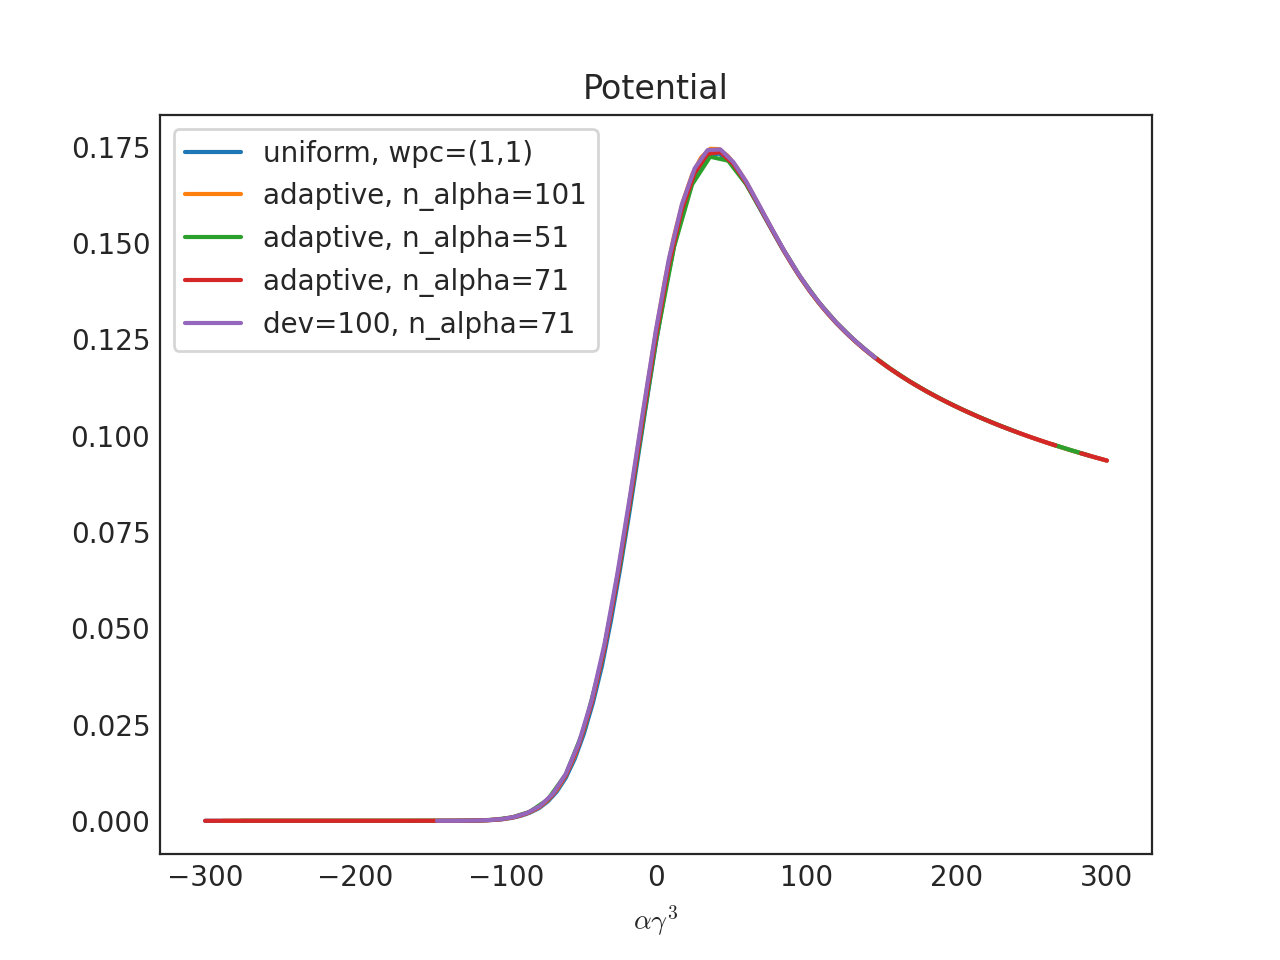

Text(0.5, 1.0, 'Potential')

In [55]:
plt.figure()
alpha_axis = np.linspace(-300,300, mesh_potential.shape[0])
# plt.plot(alpha_axis, mesh_potential_wpc0_5_1, label="wpc=(0.5,1)")
# plt.plot(alpha_axis, mesh_potential_wpc0_5_1_r2, label="wpc=(0.5,1), r=2")
plt.plot(alpha_axis, mesh_potential, label="uniform, wpc=(1,1)")
plt.plot(alpha_axis, mesh_potential_nalpha_101, label="adaptive, n_alpha=101")
alpha_axis_51 = np.linspace(-300,300, mesh_potential_nalpha_51.shape[0])
alpha_axis_71 = np.linspace(-300,300, mesh_potential_nalpha_71.shape[0])
plt.plot(alpha_axis_51, mesh_potential_nalpha_51, label="adaptive, n_alpha=51")
plt.plot(alpha_axis_71, mesh_potential_nalpha_71, label="adaptive, n_alpha=71")
plt.plot(alpha_axis_71, mesh_potential_nalpha_71_dev_100, label="dev=100, n_alpha=71")
# plt.plot(alpha_axis, mesh_potential_wpc4_1, "k-", label="wpc=(4,1)")
plt.xlabel(r"$\alpha \gamma^{3}$")
plt.legend()
plt.title("Potential")

## from parabolic cylinder function (for Gaussian beam only)

In [15]:
import scipy

#x = axis_1e5/sigma
x = alpha_axis/sigma
parabolic_cylinder_func = scipy.special.pbdv(1.0/3.0, -x) 
temp=parabolic_cylinder_func[0].copy()
analytic_beam_fld = temp*np.exp(-x**2.0/4.0)*scipy.special.gamma(2.0/3.0) 

<IPython.core.display.Javascript object>


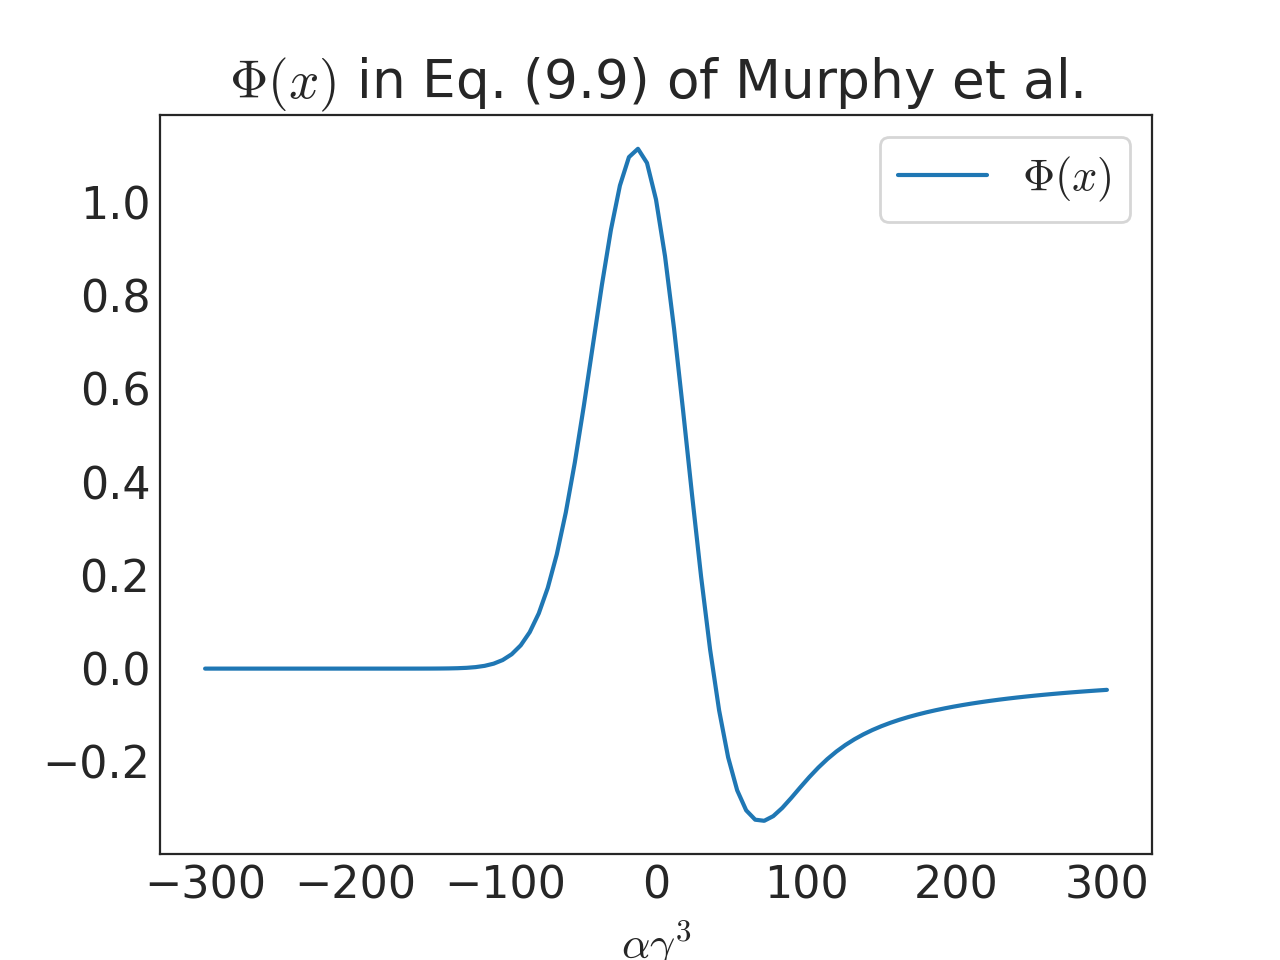

In [16]:
plt.figure()
plt.clf()
#plt.plot(axis_1e5, analytic_beam_fld, label=r"$\Phi(x)$")
plt.plot(alpha_axis, analytic_beam_fld, label=r"$\Phi(x)$")
plt.xlabel(r"$\alpha \gamma^{3}$")
plt.title(r"$\Phi(x)$ in Eq. (9.9) of Murphy et al.")
plt.legend(loc="upper right")

In [17]:
# Eq. (9.8) in Murphy 1997 paper, in unit of e*gamma^4/R^2, averaged for each particle (i.e., beam of chagre e)
analytic_beam_fld *= np.sqrt(2.0/np.pi)/(3.0*(sigma/gamma**3.0/R_bend)**4.0)**(1.0/3.0)/gamma**4.0

<IPython.core.display.Javascript object>


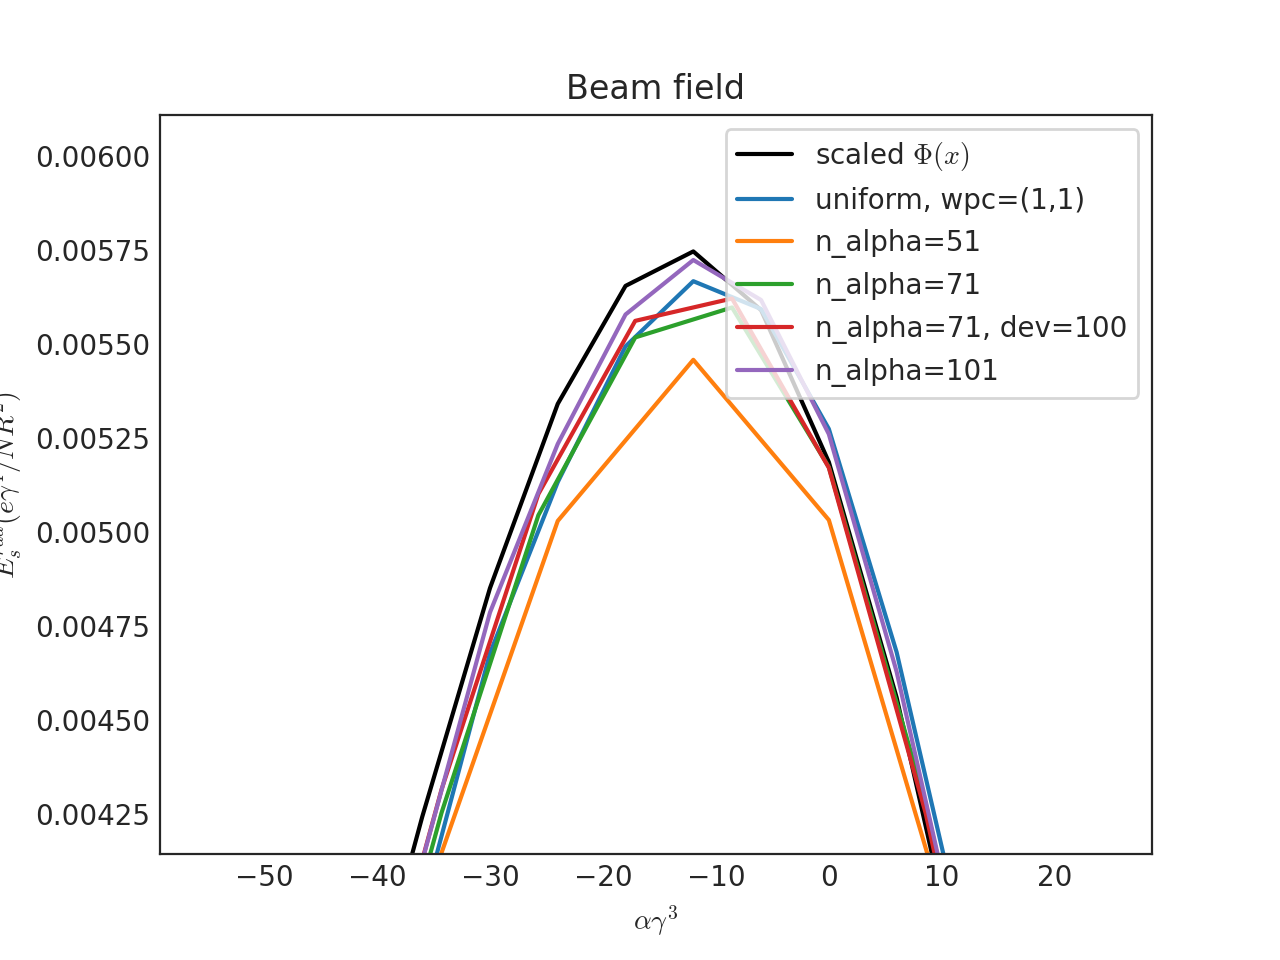

In [58]:
plt.figure()
# plt.plot(alpha_axis,mesh_fld_wpc0_5_1, label="CoSyR, wpc=(0.5,1)")
# plt.plot(alpha_axis,mesh_fld_wpc0_5_1_r2, label="CoSyR, wpc=(0.5,1), r=2")

# plt.plot(alpha_axis,mesh_fld_wpc4_1, label="CoSyR, wpc=(4,1)")
#plt.plot(axis_1e5, beam_fld_1e5, label="Numeric, res=1e5")
#plt.plot(axis_1e5, analytic_beam_fld, label="Analytic")
plt.plot(alpha_axis, analytic_beam_fld, "k-", label="scaled $\Phi(x)$")
plt.plot(alpha_axis,mesh_fld, label="uniform, wpc=(1,1)")
plt.plot(alpha_axis_51,mesh_fld_nalpha_51, label="n_alpha=51")
plt.plot(alpha_axis_71,mesh_fld_nalpha_71, label="n_alpha=71")
plt.plot(alpha_axis_71,mesh_fld_nalpha_71_dev_100, label="n_alpha=71, dev=100")
plt.plot(alpha_axis,mesh_fld_nalpha_101, label="n_alpha=101")

plt.xlabel(r"$\alpha \gamma^{3}$")
plt.ylabel(r"$E_{s}^{rad} (e \gamma^4/NR^2)$")
plt.title("Beam field")
plt.legend(loc="upper right")

In [32]:
from numpy import linalg 

# print("wpc=(0.5,1): L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld_wpc0_5_1))
# print("wpc=(0.5,1), r=2: L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld_wpc0_5_1_r2))
print("wpc=(1,1): L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld))
print("n_alpha=71: L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld_nalpha_71))
# print("n_alpha=101: L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld_nalpha_101))
# print("wpc=(4,1): L2 norm =", linalg.norm(analytic_beam_fld-mesh_fld_wpc4_1))

wpc=(1,1): L2 norm = 0.0009575090138638237


ValueError: operands could not be broadcast together with shapes (101,) (71,) 